# Introdução

### Tema:

O que tem maior influência na nota final de um estudante.

### Pergunta:

Dependendo da situação escolar durante toda sua vida, ou seja, as caracteristicas academicas do aluno e de sua familia, suas condições socioêconomicas e seus resultados ao longo do ano escolar, qual será a nota final desse aluno?

### Objetivo:

Prever uma informação numérica (nesse caso, o target é quantitativo), ao considerar outros 8 tipos de dados quantitativos.

### Técnica Utilizada:

Uma das técnicas escolhidas pelo grupo para realizar a apalise foi a 'Regressão linear'. Dentro os motivos pelos quais escolhemos esta, encontra-se o fator de os dados a serem analizados pelo grupo são quantitativos, assim limitando as possibilidades de técnicas.
A outra técnica escolhida pelo grupo é a 'Regression Tree', escolhida com nenhum grande motivo em mente.

### Base de Dados:

#### Índice do Dataset

1.School - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2.Sex - student's sex (binary: 'F' - female or 'M' - male)

3.Age - student's age (numeric: from 15 to 22)

4.Address - student's home address type (binary: 'U' - urban or 'R' - rural)

5.Famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6.Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7.Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8.Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9.Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10.Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11.Reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12.Guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13.Traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14.Studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15.Failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16.Schoolsup - extra educational support (binary: yes or no)

17.Famsup - family educational support (binary: yes or no)

18.Paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19.Activities - extra-curricular activities (binary: yes or no)

20.Nursery - attended nursery school (binary: yes or no)

21.Higher - wants to take higher education (binary: yes or no)

22.Internet - Internet access at home (binary: yes or no)

23.Romantic - with a romantic relationship (binary: yes or no)

24.Famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25.Freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26.Goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27-Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28-Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29.Health - current health status (numeric: from 1 - very bad to 5 - very good)

30.Absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

    *G1 - first period grade (numeric: from 0 to 20)
    *G2 - second period grade (numeric: from 0 to 20)
    *G3 - final grade (numeric: from 0 to 20, output target)

### Trabalhos Acadêmicos:

Alguns estudos já realizdos sobre esse tema para que possamos comparar ao final do trabalho:
    * https://web.a.ebscohost.com/abstract?direct=true&profile=ehost&scope=site&authtype=crawler&jrnl=00220892&AN=6271257&h=zZRbm5t29cbd1F0W3Bb%2bbHAKUHq6IZXFZMcUIYW9Qj%2fW5dqzwCGNR3DzGlFQMue4V5UiPXwMUCHO4cSb55xsXQ%3d%3d&crl=c&resultNs=AdminWebAuth&resultLocal=ErrCrlNotAuth&crlhashurl=login.aspx%3fdirect%3dtrue%26profile%3dehost%26scope%3dsite%26authtype%3dcrawler%26jrnl%3d00220892%26AN%3d6271257
    *https://muse.jhu.edu/article/201906
    *https://www.sciencedirect.com/science/article/pii/S0022440598000089
    *https://journals.sagepub.com/doi/abs/10.3102/0002831219833917

### Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import csv
import matplotlib.pyplot as plt

# Minerando Dados e Características do Dataset

In [2]:
student_mat_data = pd.read_csv('student-mat.csv')

student_por_data = pd.read_csv('student-por.csv')

base = pd.concat([student_por_data,student_mat_data],ignore_index=True)

base

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
1040,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
1041,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
1042,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Índice do Dataset

#### Aqui escolhemos renomear a coluna G3 por um nome mais intuitivo com todo tema do dataset.

In [3]:
#base.rename(columns={'sex':'Genero'}, inplace=True)
#base.rename(columns={'age':'Idade'}, inplace=True)
#base.rename(columns={'health':'Saúde'}, inplace=True)
#base.rename(columns={'failures':'Reprovações'}, inplace=True)
#base.rename(columns={'famrel':'Rel. familiar'}, inplace=True)
#base.rename(columns={'Walc':'Cons_fim'}, inplace=True)
#base.rename(columns={'G3':'Nota Final'}, inplace=True)
#base.rename(columns={'absences':'Faltas'}, inplace=True)
base


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
1040,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
1041,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
1042,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


#### Neste passo, estamos veficando se existe algum valor nulo, para assim garantir que não haja nenhuma alteração nos valores finais. Como resultado, descobrimos que não havia nenhuma linha nula, assim não tivemos que retirar nada do dataset.

In [4]:
base.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### Aqui foi feito a definição de quais são as colunas categoricas.

In [5]:
falsas_numericas = ['','Saúde','studytime','Medu','Fedu','Rel. familiar', 'goout', 'freetime','Genero']
categoricas = base.select_dtypes(exclude=[np.number]).columns

for column in categoricas:
    base[column] = base[column].astype('category')
    
num_base = base.select_dtypes(include=[np.number]).columns
cat_base = base.select_dtypes(exclude=[np.number]).columns
print(num_base)
print("\n {}".format(cat_base))

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

 Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [6]:
falsas_numericas = ['Medu', 'Fedu','famrel','freetime', 'goout','Walc', 'Dalc','health']
for column in falsas_numericas:
    base[column] = base[column].astype('category')
    
num_base = base.select_dtypes(include=[np.number]).columns
cat_base = base.select_dtypes(exclude=[np.number]).columns

print(num_base)
print("\n {}".format(cat_base))

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

 Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health'],
      dtype='object')


In [7]:
#base['Genero']=base['Genero'].replace('M',1)
#base['Genero']=base['Genero'].replace('F',2)
#base

In [8]:
#from sklearn.preprocessing import LabelEncoder
#base['Walc_Cat']=base['Walc'].cat.codes
#base[['Walc', 'Walc_Cat']]

In [9]:
base.describe()

,age,traveltime,studytime,failures,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,1.522989,1.970307,0.264368,4.434866,11.213602,11.246169,11.341954
std,1.239975,0.731727,0.834353,0.656142,6.210017,2.983394,3.285071,3.864796
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,1.000000,2.000000,0.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,2.000000,0.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,3.000000,75.000000,19.000000,19.000000,20.000000


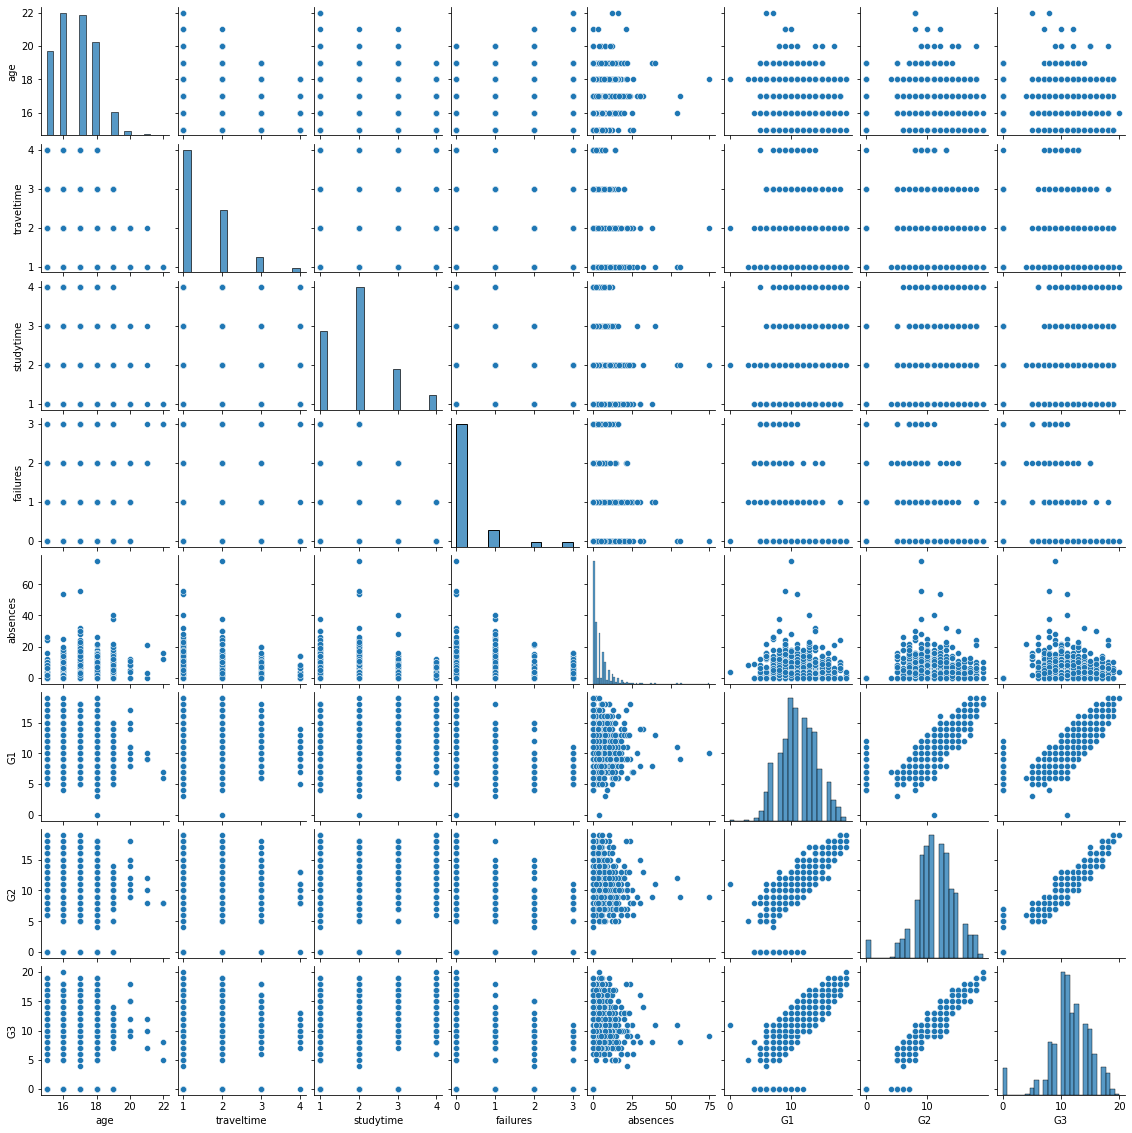

In [29]:
import seaborn as sns
sns.pairplot(base, height=2);

# Modelos de Predição

## Regressão Linear

In [11]:
X = base[['age', 'failures', 'absences', 'G1', 'G2','traveltime','studytime']]
Y = base['G3']

In [12]:
import statsmodels.api as sm

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     756.0
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:42:16   Log-Likelihood:                -1947.7
No. Observations:                1044   AIC:                             3911.
Df Residuals:                    1036   BIC:                             3951.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5194      0.726     -0.716      0.474      -1.944       0.905
age           -0.0349      0.041     -0.845      0.398      -0.116       0.046
failures      -0.2517      0.084     -3.012      0.003      -0.416      -0.088
absences       0.0264      0.008      3.312      0.001       0.011       0.042
G1             0.1278      0.032      3.977      0.000       0.065       0.191
G2             0.9626      0.029     33.041      0.000       0.905       1.020
traveltime     0.1500      0.067      2.229      0.026       0.018       0.282
studytime     -0.0470      0.060     -0.783      0.434      -0.165       0.071
==============================================================================
Omnibus:                      674.212   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8627.436
Skew:                          -2.809   Prob(JB):                         0.00
Kurtosis:                      15.914   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X = base[['failures', 'absences', 'G1', 'G2','traveltime','studytime']]
Y = base['G3']

In [14]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     882.1
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:42:16   Log-Likelihood:                -1948.0
No. Observations:                1044   AIC:                             3910.
Df Residuals:                    1037   BIC:                             3945.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0892      0.269     -4.054      0.000      -1.616      -0.562
failures      -0.2694      0.081     -3.331      0.001      -0.428      -0.111
absences       0.0255      0.008      3.229      0.001       0.010       0.041
G1             0.1282      0.032      3.993      0.000       0.065       0.191
G2             0.9624      0.029     33.039      0.000       0.905       1.020
traveltime     0.1482      0.067      2.204      0.028       0.016       0.280
studytime     -0.0496      0.060     -0.827      0.408      -0.167       0.068
==============================================================================
Omnibus:                      679.373   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8826.928
Skew:                          -2.833   Prob(JB):                         0.00
Kurtosis:                      16.069   Cond. No.                         97.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X = base[['failures', 'absences', 'G1', 'G2','traveltime']]
Y = base['G3']

In [16]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1059.
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:42:16   Log-Likelihood:                -1948.4
No. Observations:                1044   AIC:                             3909.
Df Residuals:                    1038   BIC:                             3938.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1683      0.251     -4.654      0.000      -1.661      -0.676
failures      -0.2644      0.081     -3.278      0.001      -0.423      -0.106
absences       0.0258      0.008      3.279      0.001       0.010       0.041
G1             0.1256      0.032      3.931      0.000       0.063       0.188
G2             0.9626      0.029     33.055      0.000       0.906       1.020
traveltime     0.1514      0.067      2.254      0.024       0.020       0.283
==============================================================================
Omnibus:                      682.516   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8983.573
Skew:                          -2.846   Prob(JB):                         0.00
Kurtosis:                      16.195   Cond. No.                         90.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

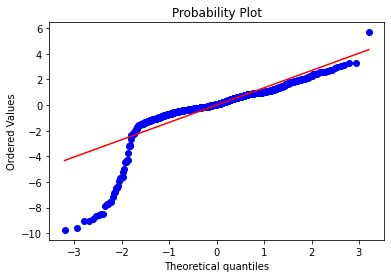

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

probplot(results.resid, dist="norm", plot= plt);

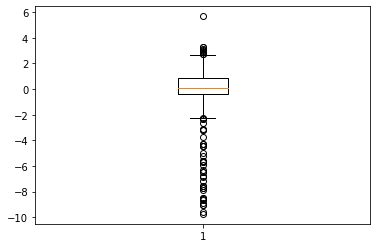

In [18]:
plt.boxplot(results.resid);

In [19]:
print(np.where(results.resid<-6))
print(np.where(results.resid>3))

(array([163, 172, 519, 586, 637, 639, 640, 789, 817, 888, 908, 913, 945,
       959, 965, 982, 983, 986, 990, 992], dtype=int64),)
(array([ 61, 307, 389, 518, 692], dtype=int64),)


In [20]:
base = base.drop(axis=0, index=[ 163, 172, 519, 586, 637, 639, 640, 789, 817, 888, 908, 913, 945,
       959, 965, 982, 983, 986, 990, 992, 61, 307, 389, 518, 692])

In [21]:
base

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
1040,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
1041,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
1042,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [22]:
X = base[['failures', 'absences', 'G1', 'G2','traveltime']]
Y = base['G3']
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2103.
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:42:17   Log-Likelihood:                -1501.6
No. Observations:                1019   AIC:                             3015.
Df Residuals:                    1013   BIC:                             3045.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2112      0.174     -1.217      0.224      -0.552       0.129
failures      -0.2573      0.055     -4.672      0.000      -0.365      -0.149
absences       0.0060      0.005      1.122      0.262      -0.005       0.017
G1             0.0801      0.022      3.677      0.000       0.037       0.123
G2             0.9551      0.020     48.279      0.000       0.916       0.994
traveltime     0.0653      0.046      1.422      0.155      -0.025       0.155
==============================================================================
Omnibus:                      416.185   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3470.801
Skew:                          -1.652   Prob(JB):                         0.00
Kurtosis:                      11.416   Cond. No.                         91.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X = base[['failures', 'G1', 'G2','traveltime']]
Y = base['G3']
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2628.
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:42:17   Log-Likelihood:                -1502.3
No. Observations:                1019   AIC:                             3015.
Df Residuals:                    1014   BIC:                             3039.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1691      0.169     -0.998      0.319      -0.502       0.163
failures      -0.2531      0.055     -4.606      0.000      -0.361      -0.145
G1             0.0793      0.022      3.644      0.000       0.037       0.122
G2             0.9547      0.020     48.261      0.000       0.916       0.994
traveltime     0.0631      0.046      1.375      0.169      -0.027       0.153
==============================================================================
Omnibus:                      425.084   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3654.482
Skew:                          -1.686   Prob(JB):                         0.00
Kurtosis:                      11.643   Cond. No.                         86.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
X = base[[ 'G1', 'G2','failures']]
Y = base['G3']
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     3501.
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:42:17   Log-Likelihood:                -1503.2
No. Observations:                1019   AIC:                             3014.
Df Residuals:                    1015   BIC:                             3034.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0535      0.147     -0.364      0.716      -0.342       0.235
G1             0.0795      0.022      3.648      0.000       0.037       0.122
G2             0.9528      0.020     48.262      0.000       0.914       0.992
failures      -0.2499      0.055     -4.549      0.000      -0.358      -0.142
==============================================================================
Omnibus:                      423.669   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3640.902
Skew:                          -1.679   Prob(JB):                         0.00
Kurtosis:                      11.630   Cond. No.                         74.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

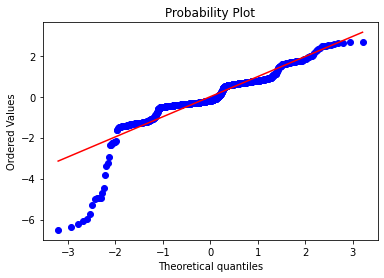

In [25]:
probplot(results.resid, dist="norm", plot= plt);

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
y_pred = regressor.predict(X_test.reshape(-1,1))

AttributeError: 'DataFrame' object has no attribute 'reshape'

# Processo e Estatísticas de Validação

# Conclusão

# Referências Bibliográficas